# 1. Install and Import Dependencies

# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\gunja/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-19 Python-3.12.3 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [7]:
img= 'https://c.pxhere.com/photos/10/ab/highway_travel_ride_reindeer_autos_traffic_vehicles_motor_vehicles_multi_track-1393510.jpg!d'

In [8]:
results = model(img)
results.print()

image 1/1: 1214x1200 22 cars, 1 truck
Speed: 1751.1ms pre-process, 347.4ms inference, 27.2ms NMS per image at shape (1, 3, 640, 640)


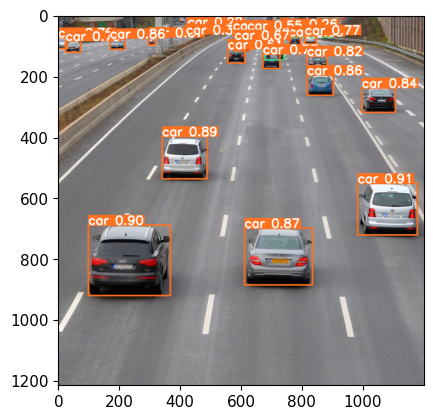

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[ 90,  85,  82],
         [142, 137, 134],
         [151, 143, 141],
         ...,
         [ 99,  79,  70],
         [133, 111, 100],
         [188, 166, 155]],
 
        [[ 91,  86,  83],
         [143, 138, 135],
         [152, 144, 142],
         ...,
         [102,  82,  73],
         [135, 113, 102],
         [189, 167, 156]],
 
        [[ 93,  85,  83],
         [145, 137, 135],
         [154, 146, 144],
         ...,
         [103,  83,  74],
         [135, 113, 102],
         [186, 164, 153]],
 
        ...,
 
        [[114, 114, 112],
         [118, 118, 116],
         [115, 115, 113],
         ...,
         [122, 121, 126],
         [124, 124, 126],
         [123, 123, 125]],
 
        [[114, 114, 114],
         [117, 117, 117],
         [115, 115, 115],
         ...,
         [121, 121, 123],
         [123, 123, 125],
         [123, 123, 125]],
 
        [[111, 111, 111],
         [116, 116, 116],
         [116, 116, 116],
         ...,
         [121, 121, 123],
  

# 4. Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

In [11]:
import cv2
import numpy as np

# Load the video
cap = cv2.VideoCapture(r"C:\Users\gunja\Documents\Data Analytics\traffic.mp4")

# Define the new width and height
new_width = 640  # New width
new_height = 480  # New height

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize the frame
    resized_frame = cv2.resize(frame, (new_width, new_height))
    
    # Make detections 
    results = model(resized_frame)
    
    # Display the detections
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Check for the 'q' key press to exit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


# 5. Train from scratch

In [12]:
import uuid   # Unique identifier
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 30

In [40]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(1)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.eada77b6-fdb5-11ee-964a-30f6ef6def38.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.ec431f3f-fdb5-11ee-96a4-30f6ef6def38.jpg
data\images\awake.ec431f40-fdb5-11ee-bc5a-30f6ef6def38.jpg
data\images\awake.ec431f41-fdb5-11ee-97f4-30f6ef6def38.jpg
data\images\awake.ec431f42-fdb5-11ee-93f8-30f6ef6def38.jpg
data\images\awake.ec431f43-fdb5-11ee-9347-30f6ef6def38.jpg
data\images\awake.ec431f44-fdb5-11ee-a9de-30f6ef6def38.jpg
data\images\awake.ec431f45-fdb5-11ee-b9b6-30f6ef6def38.jpg
data\images\awake.ec431f46-fdb5-11ee-b777-30f6ef6def38.jpg
data\images\awake.ec431f47-fdb5-11ee-b725-30f6ef6def38.jpg
data\images\awake.ec431f48-fdb5-11ee-935d-30f6ef6def38.jpg
data\images\awake.ec431f49-fdb5-11ee-a39d-30f6ef6def38.jpg
data\images\awake.ec431f4a-fdb5-11ee-8bd0-30f6ef6def38.jpg
data\images\awake.ec431f4b-fdb5-11ee-aca4-30f6ef6def38.jpg
data\images\awake.ec431f4c-fdb5-11ee-a160-30f6ef6def38.jpg
data\images\awake.ec431f4d-fdb5-11ee-98fe-30f6ef6def38.jpg
data\images\awake.ec431f4e-fdb5-11ee-953c-30f6ef6def38.jpg
data\images\awake.ec431f4f-fdb5-11ee-8cd1-30f6ef6def38.j

In [14]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [15]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [16]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
From https://github.com/ultralytics/yolov5
 * [new branch]        snyk-fix-18f3677f1c86501ef9d2b0c1b34d6fc9 -> origin/snyk-fix-18f3677f1c86501ef9d2b0c1b34d6fc9
github:  YOLOv5 is out of date by 9 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\gun

# 6. Load Custom Model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\gunja/.cache\torch\hub\master.zip
YOLOv5  2024-4-19 Python-3.12.3 torch-2.2.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [27]:
img = os.path.join('data', 'images', 'awake.6f0dae16-fae5-11ee-a515-8080d2bc5ce7.jpg')

In [28]:
results = model(img)

In [29]:
results.print()

image 1/1: 480x640 1 awake
Speed: 12.5ms pre-process, 364.9ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)


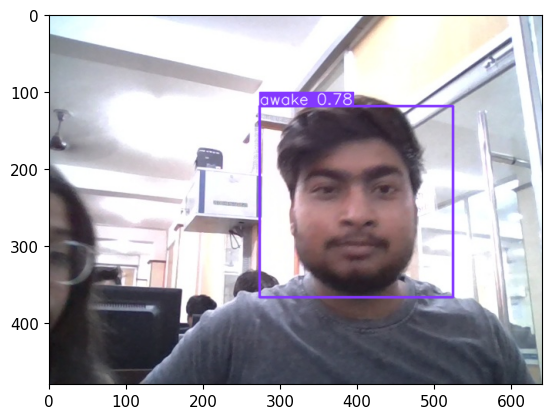

In [30]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [31]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 